In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Sample data: [Study Hours, Attendance %]
X = np.array([
    [2, 60],
    [3, 65],
    [4, 70],
    [5, 75],
    [6, 80],
    [7, 85],
    [8, 90],
    [9, 95],
    [10, 97],
    [11, 99]
])

# Final exam scores (target variable)
y = np.array([50, 55, 60, 62, 65, 70, 75, 80, 85, 90])

In [3]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Train using SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd.fit(X_scaled, y)

# Coefficients
print("Coefficients:", sgd.coef_)
print("Intercept:", sgd.intercept_)

Coefficients: [6.61077487 5.7835729 ]
Intercept: [68.96694261]


In [5]:
# Predict and evaluate
y_pred = sgd.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.59
R-squared: 0.98


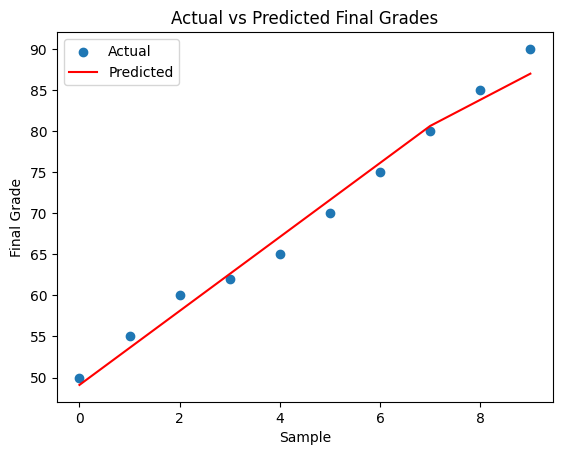

In [6]:
# Plot predictions
plt.scatter(range(len(y)), y, label='Actual')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Final Grades')
plt.xlabel('Sample')
plt.ylabel('Final Grade')
plt.legend()
plt.show()